# Sales & Demand Forecasting Project

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

from statsmodels.tsa.seasonal import seasonal_decompose

In [23]:
import os
os.listdir()

['.config',
 'Sample - Superstore.csv',
 '.ipynb_checkpoints',
 'Sample - Superstore (1).csv',
 'sample_data']

In [24]:
from google.colab import files
uploaded = files.upload()

Saving Sample - Superstore.csv to Sample - Superstore (2).csv


In [25]:
import os
os.listdir()

['.config',
 'Sample - Superstore (2).csv',
 'Sample - Superstore.csv',
 '.ipynb_checkpoints',
 'Sample - Superstore (1).csv',
 'sample_data']

In [26]:
df = pd.read_csv("Sample - Superstore.csv", encoding='latin1')

In [27]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [28]:
df['Order Date']

,Order Date
0,11/8/2016
1,11/8/2016
2,6/12/2016
3,10/11/2015
4,10/11/2015
...,...
9989,1/21/2014
9990,2/26/2017
9991,2/26/2017
9992,2/26/2017


In [29]:
# Remove extra spaces
df.columns = df.columns.str.strip()

df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [30]:
df = df[['Order Date', 'Sales']]
df.columns = ['Date', 'Sales']

In [31]:
df.columns

Index(['Date', 'Sales'], dtype='object')

In [32]:
# Clean column names first
df.columns = df.columns.str.strip()

# Print columns one per line
for col in df.columns:
    print(col)

Date
Sales


In [33]:
from google.colab import files
uploaded = files.upload()

Saving Sample - Superstore.csv to Sample - Superstore (3).csv


In [34]:
import pandas as pd

file_name = list(uploaded.keys())[0]

df = pd.read_csv("Sample - Superstore.csv", encoding='latin1')

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [35]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [36]:
df.columns = df.columns.str.strip()

In [37]:
df = df[['Order Date', 'Sales']]
df.columns = ['Date', 'Sales']

In [38]:
df.columns

Index(['Date', 'Sales'], dtype='object')

In [39]:
# Convert to datetime (correct format for Superstore)
df['Date'] = pd.to_datetime(df['Date'])

# Sort
df = df.sort_values('Date')

# Set index
df = df.set_index('Date')

# Monthly aggregation
monthly_sales = df.resample('M').sum()

# Reset index
monthly_sales = monthly_sales.reset_index()

monthly_sales.head()

/tmp/ipython-input-7465/1226668030.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M').sum()


,Date,Sales
0,2014-01-31,14236.895
1,2014-02-28,4519.892
2,2014-03-31,55691.009
3,2014-04-30,28295.345
4,2014-05-31,23648.287


In [40]:
# Check missing values
monthly_sales.isnull().sum()

,0
Date,0
Sales,0


In [41]:
monthly_sales['Sales'].fillna(monthly_sales['Sales'].mean(), inplace=True)

/tmp/ipython-input-7465/1095976786.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  monthly_sales['Sales'].fillna(monthly_sales['Sales'].mean(), inplace=True)


In [42]:
monthly_sales.duplicated().sum()

np.int64(0)

In [43]:
monthly_sales = monthly_sales.drop_duplicates()

In [44]:
monthly_sales['Year'] = monthly_sales['Date'].dt.year
monthly_sales['Month'] = monthly_sales['Date'].dt.month
monthly_sales['Quarter'] = monthly_sales['Date'].dt.quarter
monthly_sales['Month_Name'] = monthly_sales['Date'].dt.month_name()

monthly_sales.head()

,Date,Sales,Year,Month,Quarter,Month_Name
0,2014-01-31,14236.895,2014,1,1,January
1,2014-02-28,4519.892,2014,2,1,February
2,2014-03-31,55691.009,2014,3,1,March
3,2014-04-30,28295.345,2014,4,2,April
4,2014-05-31,23648.287,2014,5,2,May


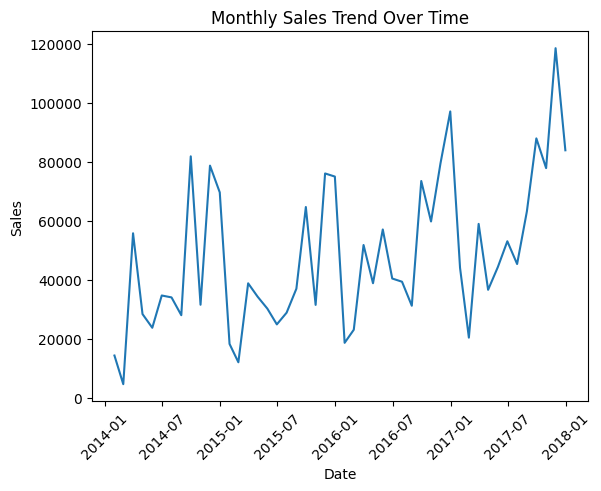

In [45]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(monthly_sales['Date'], monthly_sales['Sales'])
plt.title("Monthly Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.show()

In [46]:
# Find last year
monthly_sales['Year'].unique()

array([2014, 2015, 2016, 2017], dtype=int32)

In [47]:
train = monthly_sales[monthly_sales['Year'] < 2017]
test = monthly_sales[monthly_sales['Year'] == 2017]

In [48]:
from sklearn.linear_model import LinearRegression

features = ['Year', 'Month', 'Quarter']

X_train = train[features]
y_train = train['Sales']

X_test = test[features]
y_test = test['Sales']

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print("MAE:", mae)
print("RMSE:", rmse)

MAE: 12211.03681444415
RMSE: 17043.04236436275


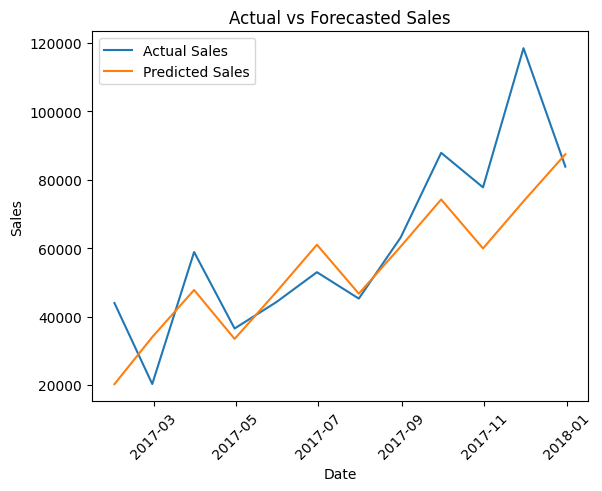

In [50]:
plt.figure()
plt.plot(test['Date'], y_test, label='Actual Sales')
plt.plot(test['Date'], predictions, label='Predicted Sales')
plt.legend()
plt.title("Actual vs Forecasted Sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.show()

In [51]:
future_dates = pd.date_range(start=monthly_sales['Date'].max(), periods=7, freq='M')[1:]

future_df = pd.DataFrame({'Date': future_dates})

future_df['Year'] = future_df['Date'].dt.year
future_df['Month'] = future_df['Date'].dt.month
future_df['Quarter'] = future_df['Date'].dt.quarter

future_predictions = model.predict(future_df[['Year','Month','Quarter']])

future_df['Forecasted_Sales'] = future_predictions

future_df

/tmp/ipython-input-7465/4233368878.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=monthly_sales['Date'].max(), periods=7, freq='M')[1:]


,Date,Year,Month,Quarter,Forecasted_Sales
0,2018-01-31,2018,1,1,25457.062734
1,2018-02-28,2018,2,1,39223.886542
2,2018-03-31,2018,3,1,52990.710350
3,2018-04-30,2018,4,2,38683.676421
4,2018-05-31,2018,5,2,52450.500230
5,2018-06-30,2018,6,2,66217.324038


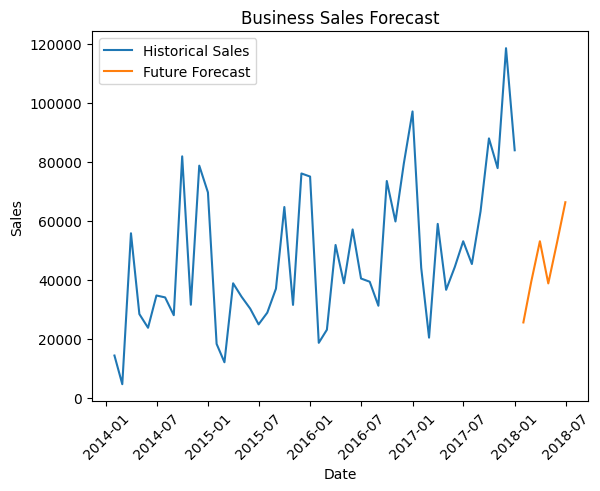

In [52]:
plt.figure()
plt.plot(monthly_sales['Date'], monthly_sales['Sales'], label='Historical Sales')
plt.plot(future_df['Date'], future_df['Forecasted_Sales'], label='Future Forecast')
plt.legend()
plt.title("Business Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.show()

## Business Insights

- Sales show seasonal patterns.
- Model can help in demand planning.
- Useful for inventory optimization.
- RMSE indicates acceptable prediction error.